In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv')

In [5]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


In [6]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [7]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

text = ['Comprei um produto ótimo','Comprei um produto ruim']

vectorize = CountVectorizer()

bag_of_words = vectorize.fit_transform(text)



In [8]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [9]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns= vectorize.get_feature_names_out())

In [10]:
sparse_matrix

,comprei,produto,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [11]:
vectorize = CountVectorizer(lowercase=False,max_features=50)

bag_of_words = vectorize.fit_transform(df.avaliacao)

print(bag_of_words.shape)

(15501, 50)


In [12]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns= vectorize.get_feature_names_out())

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(bag_of_words,df.sentimento, random_state=4978)

In [14]:
#!pip install xgboost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print("Classes after encoding:", label_encoder.classes_)


Classes after encoding: ['negativo' 'positivo']


In [15]:
xgboost =xgb.XGBClassifier(enable_categorical=True)
xgboost.fit(X_train,y_train)
accuracy = xgboost.score(X_test,y_test)
print(accuracy)

0.8046955624355006


In [16]:
def text_classifier(text, column_transcription, target):
    vectorize = CountVectorizer(lowercase=False, max_features=1000)
    bag_of_words = vectorize.fit_transform(text[column_transcription])
    X_train, X_test, y_train,y_test = train_test_split(bag_of_words,df.sentimento, random_state=4978)
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)
    xgboost =xgb.XGBClassifier(enable_categorical=True)
    xgboost.fit(X_train,y_train)
    accuracy = xgboost.score(X_test,y_test)
    return print(f"Model accuracy'{column_transcription}': {accuracy * 100:.2f}%")

In [17]:
#!pip install wordcloud # word cloud 
from wordcloud import WordCloud

all_words = [text for text in df.avaliacao] 
all_words = ' '.join([text for text in df.avaliacao])

In [18]:
word_cloud = WordCloud(collocations=False).generate(all_words)

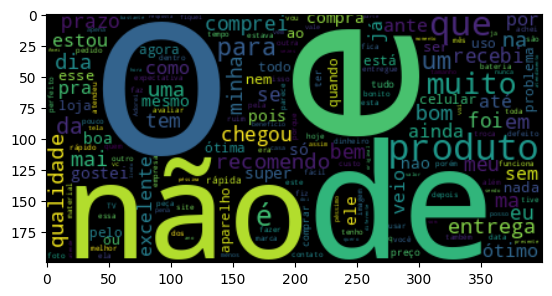

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(word_cloud,interpolation='bilinear')
plt.show()

In [20]:
def word_cloud(df, column_text, sentiment):
    text_sentiment = df.query(f"sentimento=='{sentiment}'")[column_text]
    join_text = ' '.join(text_sentiment)
    word_cloud = WordCloud(collocations=False).generate(join_text)
    plt.figure()
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

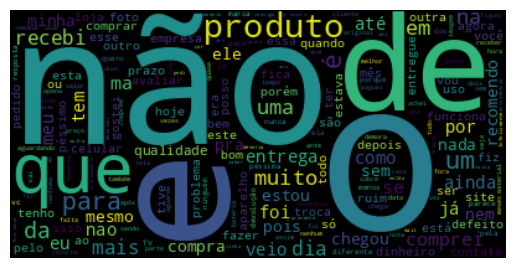

In [21]:
word_cloud(df,'avaliacao','negativo')

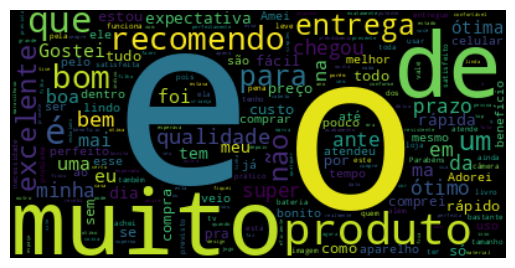

In [22]:
word_cloud(df,'avaliacao','positivo')

In [23]:
#!pip install nltk 
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_da

[nltk_data]    |   Package framenet_v15 is already up-to-date!
[nltk_data]    | Downloading package framenet_v17 to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package framenet_v17 is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package ieer to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package ieer is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package inaugural is alr

True

In [24]:
phrases = ['Um produto bom', 'Um produto ruim']

frequency = nltk.FreqDist(phrases)

frequency

FreqDist({'Um produto bom': 1, 'Um produto ruim': 1})

Tokenization

In [25]:
from nltk import tokenize 

phrase = 'O produto é excelente e a entrega foi muito rápida'

token_space = tokenize.WhitespaceTokenizer(
)
token_phrase = token_space.tokenize(phrase)

In [26]:
from nltk import tokenize 

token_space = tokenize.WhitespaceTokenizer(
)
token_phrase = token_space.tokenize(all_words)

In [27]:
frequency = nltk.FreqDist(token_phrase)
frequency

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [28]:
df_frequency = pd.DataFrame({'Word': list(frequency.keys()),
                            'Frequency':list(frequency.values()) })

In [29]:
df_frequency.nlargest(columns='Frequency',n=10)

,Word,Frequency
8,e,11813
6,o,10865
29,de,10280
19,a,8873
46,que,7657
22,não,7286
163,é,4786
63,produto,4765
177,com,4641
130,do,4583


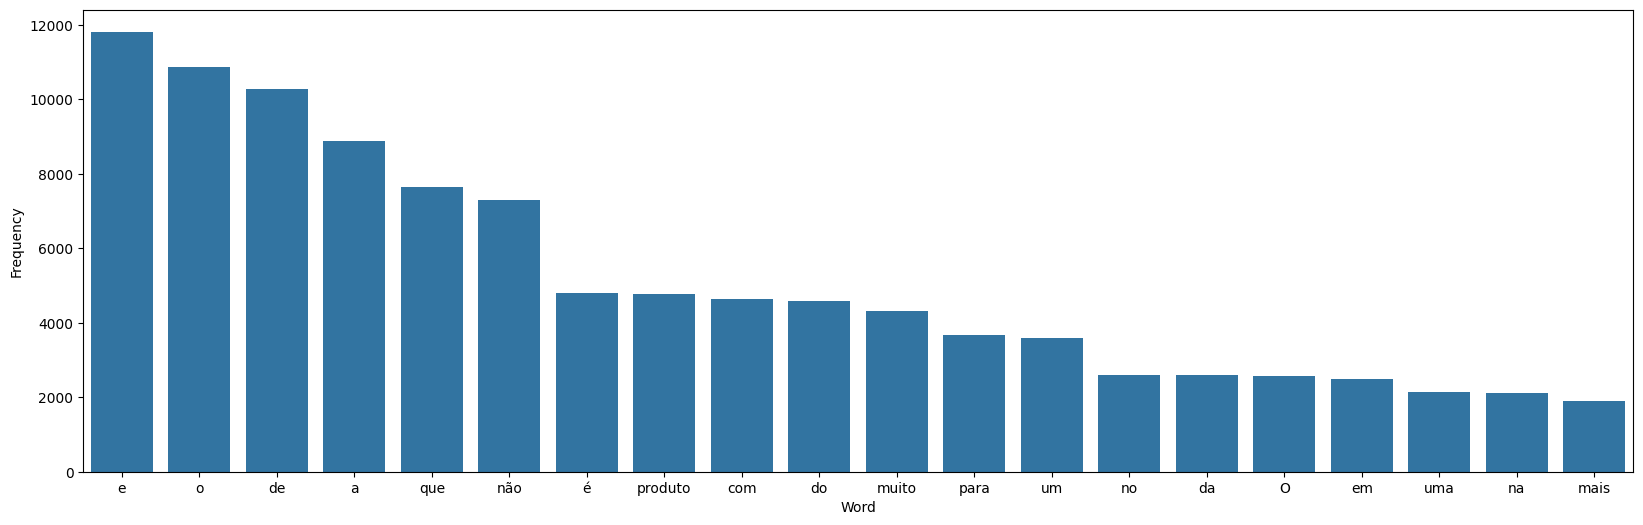

In [30]:
import seaborn as sns

plt.figure(figsize = (20,6))
ax = sns.barplot(data=df_frequency.nlargest(columns='Frequency',n=20),x='Word', y='Frequency')

In [31]:
stop_words = nltk.corpus.stopwords.words('portuguese')

In [32]:
stop_words

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [33]:
processed_phrase = []
for opinion in df.avaliacao:
    words_text = token_space.tokenize(opinion)
    new_phrase = [word for word in words_text if word not in stop_words]
    processed_phrase.append(' '.join(new_phrase))


df["treatment_1"] = processed_phrase

In [34]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,treatment_1
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo"
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe..."
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif..."
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo..."


In [35]:
text_classifier(df, "treatment_1", "sentimento"),text_classifier(df, "avaliacao", "sentimento")

Model accuracy'treatment_1': 90.56%
Model accuracy'avaliacao': 90.74%


(None, None)

In [36]:
token_punctuation = tokenize.PunktTokenizer()

In [37]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('portuguese'))  # Use Portuguese stop words
processed_phrase = []

for opinion in df.avaliacao:
    if isinstance(opinion, str):  # Ensure the value is a string
        # Tokenize the text
        words_text = word_tokenize(opinion.lower())  
        filtered_words = [word for word in words_text if word.isalpha() and word not in stop_words]
        processed_phrase.append(' '.join(filtered_words))  
    else:
        processed_phrase.append("")  

df["treatment_2"] = processed_phrase


In [38]:
print(df[["avaliacao", "treatment_2"]].head())



                                           avaliacao  \
0  Esse smartphone superou minhas expectativas, r...   
1  o cheiro e muito desagradavel!! pra quem se in...   
2  Eu fiz a compra a loja não entregou o produto,...   
3  Atendeu minhas expectativas, só achei a luz ru...   
4  Gostei muito, só achei que ficou a desejar a q...   

                                         treatment_2  
0          smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  fiz compra loja entregou produto compra feita ...  
3  atendeu expectativas achei luz ruim nada dific...  
4  gostei achei ficou desejar qualidade fotos ach...  


In [39]:
#!pip install unidecode
import unidecode 
no_accents = [unidecode.unidecode(text) for text in df['treatment_2']]

In [40]:
stop_words_no_accents =  [unidecode.unidecode(text) for text in stop_words]

In [41]:
df['treatment_3'] = no_accents

In [42]:
processed_phrase = []

for opinion in df['treatment_3']:
    if isinstance(opinion, str):  # Ensure the value is a string
        words_text = token_punctuation.tokenize(opinion)  
        filtered_words = [word for word in words_text if word not in stop_words_no_accents]
        processed_phrase.append(' '.join(filtered_words))  
    else:
        processed_phrase.append("")  

df['treatment_4'] = processed_phrase

In [43]:
print(df[["avaliacao", "treatment_4"]].head())


                                           avaliacao  \
0  Esse smartphone superou minhas expectativas, r...   
1  o cheiro e muito desagradavel!! pra quem se in...   
2  Eu fiz a compra a loja não entregou o produto,...   
3  Atendeu minhas expectativas, só achei a luz ru...   
4  Gostei muito, só achei que ficou a desejar a q...   

                                         treatment_4  
0          smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  fiz compra loja entregou produto compra feita ...  
3  atendeu expectativas achei luz ruim nada dific...  
4  gostei achei ficou desejar qualidade fotos ach...  


In [44]:
processed_phrase = []

for opinion in df['treatment_4']:
    if isinstance(opinion, str):  # Ensure the value is a string
        opinion = opinion.lower()
        words_text = token_punctuation.tokenize(opinion)  
        filtered_words = [word for word in words_text if word not in stop_words_no_accents]
        processed_phrase.append(' '.join(filtered_words))  
    else:
        processed_phrase.append("")  

df['treatment_4'] = processed_phrase

In [45]:
print(df[["avaliacao", "treatment_4"]].head())


                                           avaliacao  \
0  Esse smartphone superou minhas expectativas, r...   
1  o cheiro e muito desagradavel!! pra quem se in...   
2  Eu fiz a compra a loja não entregou o produto,...   
3  Atendeu minhas expectativas, só achei a luz ru...   
4  Gostei muito, só achei que ficou a desejar a q...   

                                         treatment_4  
0          smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  fiz compra loja entregou produto compra feita ...  
3  atendeu expectativas achei luz ruim nada dific...  
4  gostei achei ficou desejar qualidade fotos ach...  


In [46]:
text_classifier(df, "treatment_4", "sentimento"),text_classifier(df, "treatment_2", "sentimento")

Model accuracy'treatment_4': 90.09%
Model accuracy'treatment_2': 89.86%


(None, None)

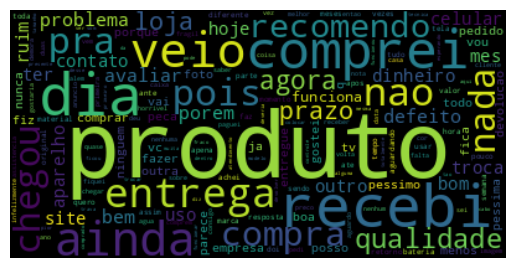

In [47]:
word_cloud(df, 'treatment_4', 'negativo')

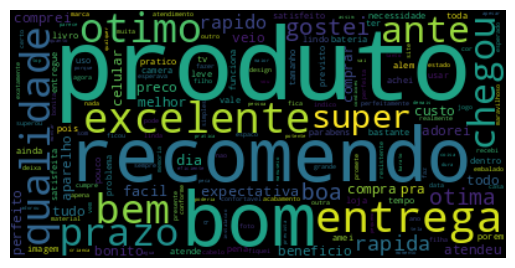

In [48]:
word_cloud(df, 'treatment_4', 'positivo')

In [49]:
processed_phrase = []
stemmer = nltk.RSLPStemmer()

for opinion in df['treatment_4']:
    if isinstance(opinion, str):  # Ensure the value is a string
        words_text = token_punctuation.tokenize(opinion)  
        new_phrase = [stemmer.stem(word) for word in words_text]
        processed_phrase.append(' '.join(new_phrase))  
    else:
        processed_phrase.append("")  

df['treatment_5'] = processed_phrase




In [50]:
text_classifier(df, "treatment_5", "sentimento"),text_classifier(df, "treatment_1", "sentimento")

Model accuracy'treatment_5': 89.34%
Model accuracy'treatment_1': 90.56%


(None, None)

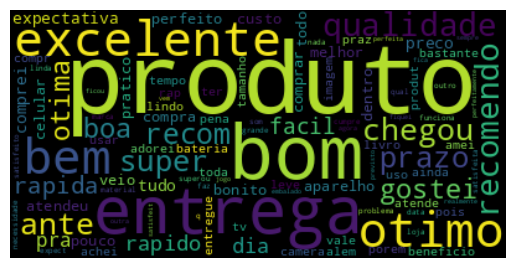

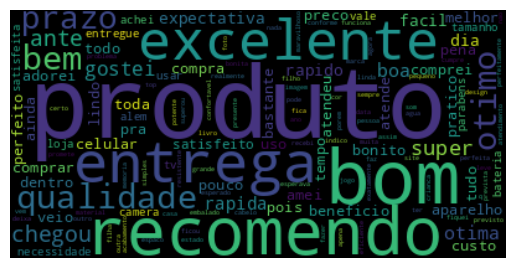

(None, None)

In [51]:
word_cloud(df, 'treatment_5', 'positivo'),word_cloud(df, 'treatment_4', 'positivo')

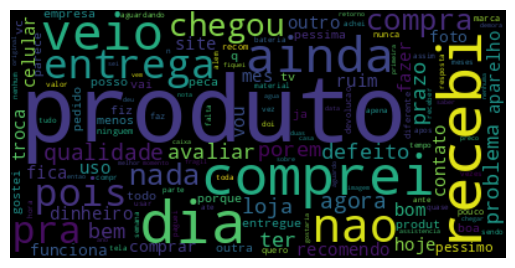

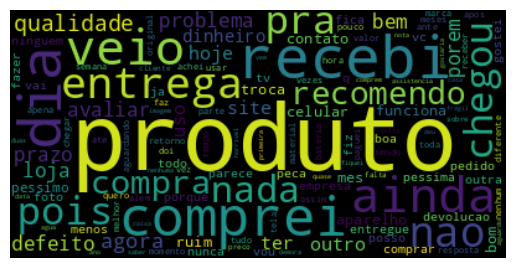

(None, None)

In [52]:
word_cloud(df, 'treatment_5', 'negativo'),word_cloud(df, 'treatment_4', 'negativo')

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
phrase = ['comprei um ótimo produto', 'comprei um produto péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)


matrix = tfidf.fit_transform(phrase)


pd.DataFrame(matrix.todense(), columns=tfidf.get_feature_names_out())

,comprei,produto,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [54]:
matrix = tfidf.fit_transform(df["treatment_5"])
X_train, X_test, y_train,y_test = train_test_split(matrix,df.sentimento, random_state=4978)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
xgboost =xgb.XGBClassifier(enable_categorical=True)
xgboost.fit(X_train,y_train)
accuracy = xgboost.score(X_test,y_test)
print(accuracy)


0.824045407636739


In [55]:
from nltk import ngrams
phrases = 'comprei um ótimo produto'
splitted_phrases = token_space.tokenize(phrases)
pairs = ngrams(splitted_phrases,2)
list(pairs)


[('comprei', 'um'), ('um', 'ótimo'), ('ótimo', 'produto')]

In [56]:
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2))
vector_tfidf = tfidf_50.fit_transform(df['treatment_5'])
X_train, X_test, y_train,y_test = train_test_split(vector_tfidf,df.sentimento, random_state=4978)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
xgboost =xgb.XGBClassifier(enable_categorical=True)
xgboost.fit(X_train,y_train)
accuracy = xgboost.score(X_test,y_test)
print(accuracy)


0.8255933952528379


In [57]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,2))
vector_tfidf = tfidf_100.fit_transform(df['treatment_5'])
X_train, X_test, y_train,y_test = train_test_split(vector_tfidf,df.sentimento, random_state=4978)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
xgboost =xgb.XGBClassifier(enable_categorical=True)
xgboost.fit(X_train,y_train)
accuracy = xgboost.score(X_test,y_test)
print(accuracy)


0.8957688338493293


In [58]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,3))
vector_tfidf = tfidf_100.fit_transform(df['treatment_5'])
X_train, X_test, y_train,y_test = train_test_split(vector_tfidf,df.sentimento, random_state=4978)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
xgboost =xgb.XGBClassifier(enable_categorical=True)
xgboost.fit(X_train,y_train)
accuracy = xgboost.score(X_test,y_test)
print(accuracy)


0.8980908152734778


In [59]:
feature_importances = pd.DataFrame(
    xgboost.feature_importances_,
    index=tfidf_100.get_feature_names_out(),
    columns=["importance"]
)

feature_importances = feature_importances.sort_values(by="importance", ascending=False)
feature_importances.head(10)

,importance
recebi,0.037720
otima,0.034399
excelente,0.030657
otimo,0.030637
super,0.020277
nao,0.014655
boa,0.014062
antes,0.012956
pessima,0.011751
dinheiro,0.011369


In [60]:
!pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
max_features = 1000  # Vocabulary size
sequence_length = 100  # Maximum sequence length

vectorizer = TextVectorization(
    max_tokens=max_features,
    output_sequence_length=sequence_length,
    ngram_range=(1, 3),
    standardize=None  # To mimic the lowercase=False setting in TfidfVectorizer
)

# Step 2: Adapt the Vectorizer to the Text Data
vectorizer.adapt(df['treatment_5'])

# Step 3: Vectorize the Text Data
X_vectorized = vectorizer(df['treatment_5']).numpy()

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, df['sentimento'], random_state=4978)

# Step 5: Encode the Target Labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Step 6: Train the XGBoost Model
xgboost = xgb.XGBClassifier(enable_categorical=True)
xgboost.fit(X_train, y_train)

# Step 7: Evaluate the Model
accuracy = xgboost.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

2024-12-10 00:35:00.849576: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 00:35:00.853143: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 00:35:00.860912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733790900.877015    9689 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733790900.880313    9689 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-10 00:35:00.895741: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

ValueError: Unrecognized keyword arguments passed to TextVectorization: {'ngram_range': (1, 3)}

2024-12-10 00:35:57.104850: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Accuracy: 0.7917
Confusion Matrix:
[[1240  282]
 [ 364 1215]]


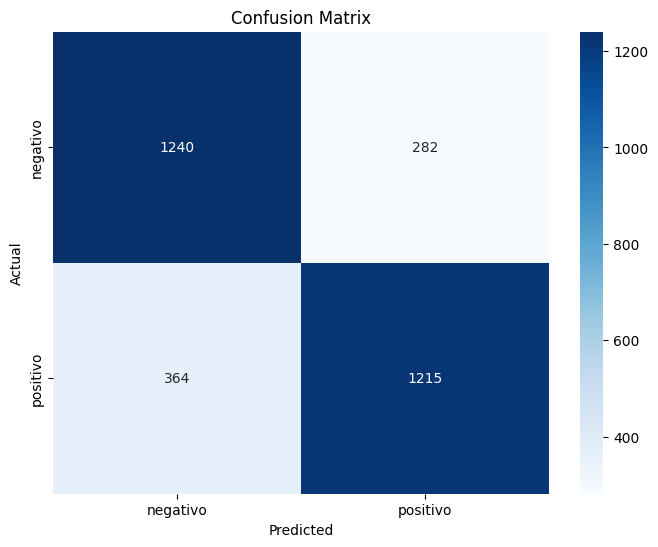

KS Statistic: 0.5894
ROC AUC Score: 0.8675


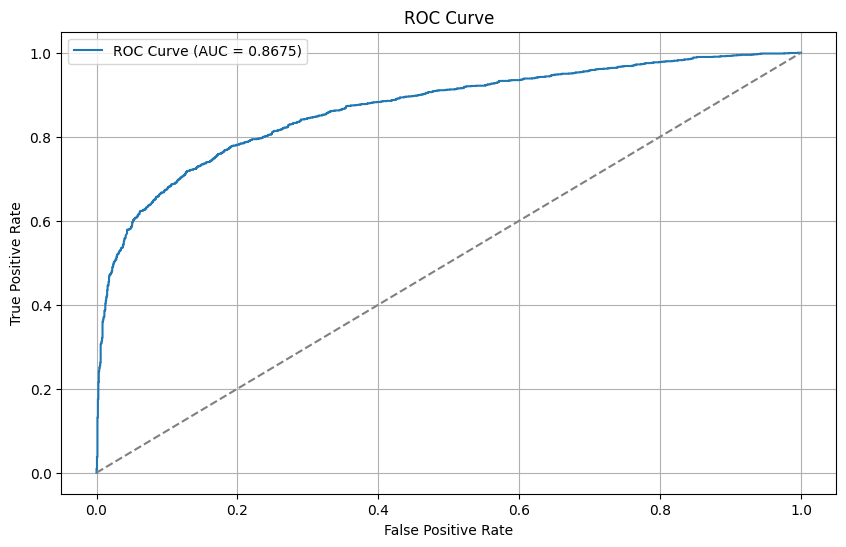

Classification Report:
              precision    recall  f1-score   support

    negativo       0.77      0.81      0.79      1522
    positivo       0.81      0.77      0.79      1579

    accuracy                           0.79      3101
   macro avg       0.79      0.79      0.79      3101
weighted avg       0.79      0.79      0.79      3101



In [65]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# For evaluation metrics
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    roc_curve, 
    roc_auc_score, 
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Define TextVectorization Layer
max_features = 1000  # Vocabulary size
sequence_length = 100  # Maximum sequence length

vectorizer = TextVectorization(
    max_tokens=max_features,
    output_sequence_length=sequence_length,
    standardize=None  # Keeps text case-sensitive
)

# Step 2: Adapt the Vectorizer to the Text Data
vectorizer.adapt(df['treatment_5'])

# Step 3: Vectorize the Text Data
X_vectorized = vectorizer(df['treatment_5']).numpy()

# Step 4: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, df['sentimento'], test_size=0.2, random_state=4978)

# Step 5: Encode the Target Labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

xgboost = xgb.XGBClassifier(enable_categorical=True, random_state=42)
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)
y_pred_proba = xgboost.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ks_statistic = max(tpr - fpr)
print(f"KS Statistic: {ks_statistic:.4f}")

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [62]:
# Step 7: Generate Predictions
y_pred = xgboost.predict(X_test)
y_pred_proba = xgboost.predict_proba(X_test)[:, 1]


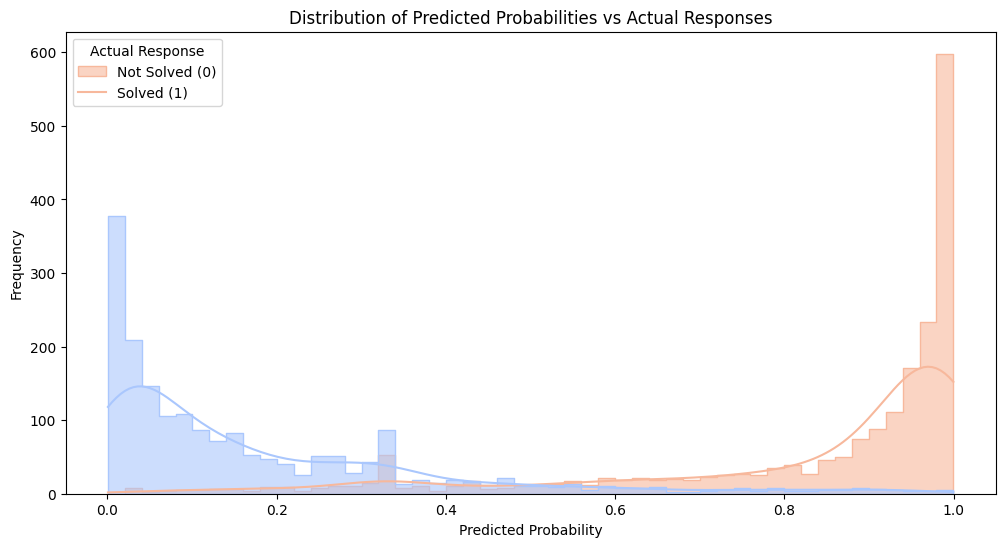

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming y_test contains the actual labels (0 or 1)
# Assuming y_pred_proba contains the predicted probabilities for the positive class (1)

# Step 1: Create a DataFrame for Visualization
df_plot = pd.DataFrame({
    'Predicted Probability': y_pred_proba,
    'Actual Response': y_test
})

# Step 2: Plot the Distribution
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_plot, 
    x='Predicted Probability', 
    hue='Actual Response', 
    bins=50, 
    kde=True, 
    palette='coolwarm', 
    alpha=0.6, 
    element='step'
)

# Customize the plot
plt.title('Distribution of Predicted Probabilities vs Actual Responses')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend(title='Actual Response', labels=['Not Solved (0)', 'Solved (1)'])

# Show the plot
plt.show()


In [66]:
X_vectorized

array([[450, 216,  73, ...,   0,   0,   0],
       [524,   1,  16, ...,   0,   0,   0],
       [ 75,  26,  39, ...,   0,   0,   0],
       ...,
       [223,   1, 219, ...,   0,   0,   0],
       [  2,   3, 274, ...,   0,   0,   0],
       [748,   1,   1, ...,   0,   0,   0]])

Accuracy: 0.8433
Confusion Matrix:
[[1347  175]
 [ 311 1268]]


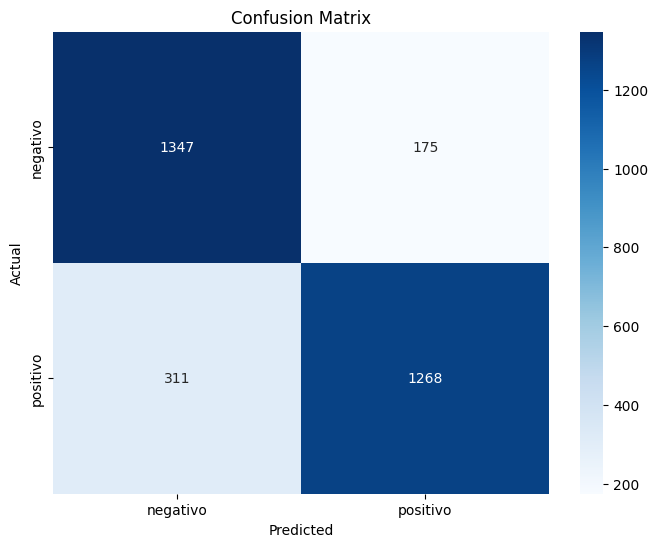

KS Statistic: 0.6917
ROC AUC Score: 0.9203


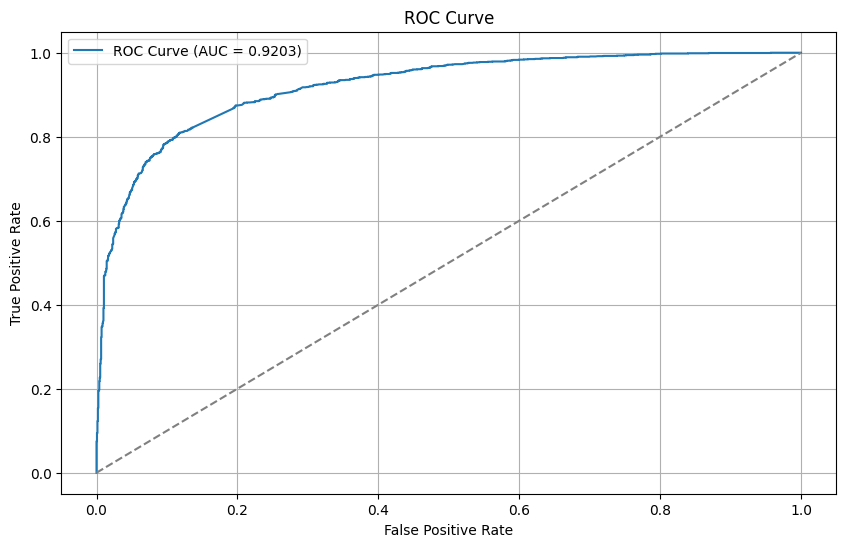

Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.89      0.85      1522
    positivo       0.88      0.80      0.84      1579

    accuracy                           0.84      3101
   macro avg       0.85      0.84      0.84      3101
weighted avg       0.85      0.84      0.84      3101



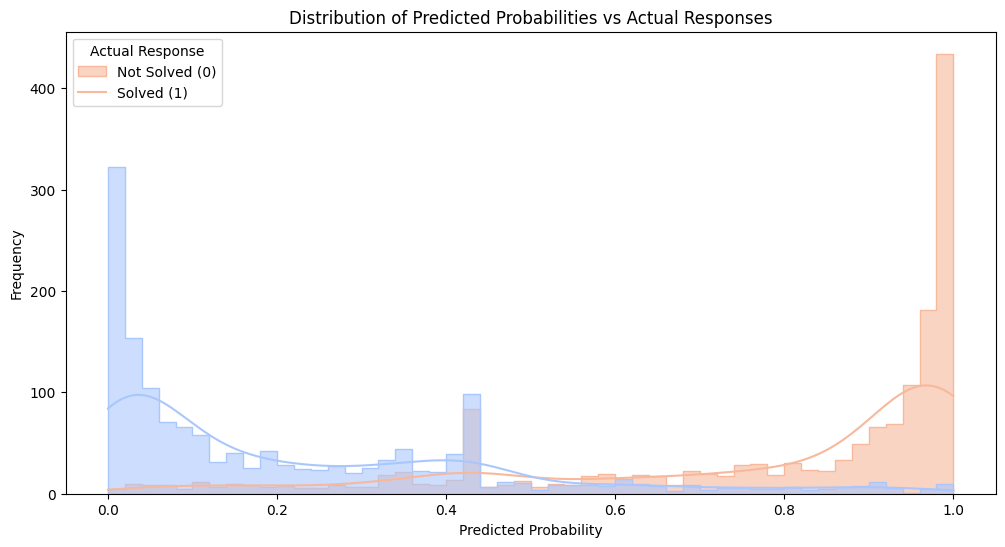

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
)
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


tfidf_vectorizer = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1, 3))
X_tfidf = tfidf_vectorizer.fit_transform(df['treatment_5'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentimento'])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=4978)

xgboost_model = xgb.XGBClassifier(enable_categorical=True, random_state=42)
xgboost_model.fit(X_train, y_train)

y_pred = xgboost_model.predict(X_test)
y_pred_proba = xgboost_model.predict_proba(X_test)[:, 1]


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
ks_statistic = max(tpr - fpr)
print(f"KS Statistic: {ks_statistic:.4f}")

auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc_score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


df_plot = pd.DataFrame({
    'Predicted Probability': y_pred_proba,
    'Actual Response': y_test
})

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_plot,
    x='Predicted Probability',
    hue='Actual Response',
    bins=50,
    kde=True,
    palette='coolwarm',
    alpha=0.6,
    element='step'
)

plt.title('Distribution of Predicted Probabilities vs Actual Responses')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend(title='Actual Response', labels=['Not Solved (0)', 'Solved (1)'])
plt.show()
